Generar Data Dummy

In [11]:
import pandas as pd
import numpy as np
import os

def generate_ice_cream_data(records=100000):
    print(f"Generando {records} registros sintéticos...")

    # 1. Crear un rango de temperaturas (Distribución normal centrada en 28°C)
    # Simulamos una ciudad litoránea cálida
    np.random.seed(42)
    temperatura = np.random.normal(loc=28, scale=5, size=records)

    # 2. Definir la lógica de ventas (Relación lineal + Ruido)
    # Ventas = (Temperatura * Coeficiente) + Intercepto + Ruido
    # Ejemplo: Por cada grado vendemos ~15 helados, con base de 50
    ruido = np.random.normal(loc=0, scale=20, size=records)
    vendas = (temperatura * 15) + 50 + ruido

    # 3. Limpieza: Asegurar que no haya ventas negativas y redondear
    vendas = np.maximum(vendas, 0).astype(int)
    temperatura = np.round(temperatura, 1)

    # 4. Crear DataFrame
    df = pd.DataFrame({
        'temperatura': temperatura,
        'vendas': vendas
    })

    # 5. Guardar en la carpeta inputs
    output_dir = '/workspaces/Repo-AZureML/inputs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Carpeta '{output_dir}' creada.")

    file_path = os.path.join(output_dir, 'vendas_sorvete.csv')
    df.to_csv(file_path, index=False)
    
    print(f"✅ Archivo generado exitosamente en: {file_path}")
    print(df.head())

if __name__ == "__main__":
    generate_ice_cream_data()

Generando 100000 registros sintéticos...
✅ Archivo generado exitosamente en: /workspaces/Repo-AZureML/inputs/vendas_sorvete.csv
   temperatura  vendas
0         30.5     527
1         27.3     436
2         31.2     530
3         35.6     571
4         26.8     445


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_theme(style="whitegrid")
%matplotlib inline

In [14]:
# Carga del dataset desde la carpeta inputs
df = pd.read_csv('/workspaces/Repo-AZureML/inputs/vendas_sorvete.csv',sep=',') 

# Visualización de las primeras filas
print("Primeras 5 filas del dataset:")
display(df.head())

# Información del esquema de datos (Tipos de datos y nulos)
print("\nInformación del Dataset:")
df.info()

Primeras 5 filas del dataset:


,temperatura,vendas
0,30.5,527
1,27.3,436
2,31.2,530
3,35.6,571
4,26.8,445



Información del Dataset:
<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperatura  100000 non-null  float64
 1   vendas       100000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [15]:
# Estadísticas clave para temperatura y ventas
display(df.describe())

# Insight: Revisamos si hay valores atípicos (outliers)

,temperatura,vendas
count,100000.000000,100000.000000
mean,28.004904,469.591090
std,5.004581,77.803794
min,5.700000,126.000000
25%,24.600000,417.000000
50%,28.000000,470.000000
75%,31.400000,522.000000
max,50.400000,835.000000


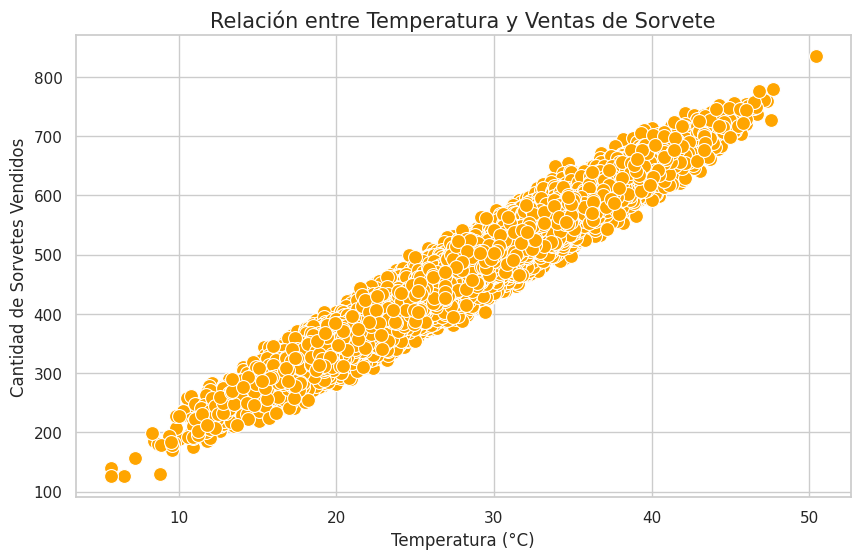

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperatura', y='vendas', color='orange', s=100)
plt.title('Relación entre Temperatura y Ventas de Sorvete', fontsize=15)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Cantidad de Sorvetes Vendidos', fontsize=12)
plt.show()

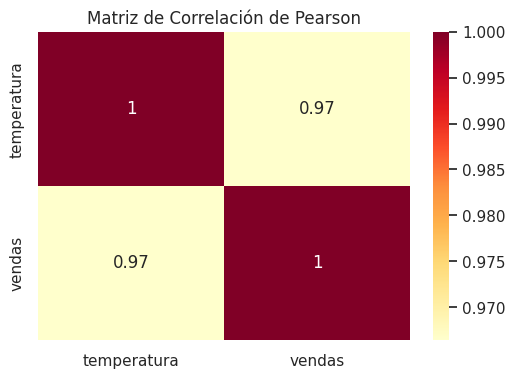

El coeficiente de correlación es: 0.97


In [17]:
plt.figure(figsize=(6, 4))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='YlOrRd')
plt.title('Matriz de Correlación de Pearson')
plt.show()

print(f"El coeficiente de correlación es: {correlation.iloc[0,1]:.2f}")

### Conclusiones de la Exploración:
1. **Fuerte Correlación:** Existe una correlación lineal positiva muy alta. A medida que sube la temperatura, las ventas aumentan de forma proporcional.
2. **Modelo Recomendado:** Dado el comportamiento de los datos, un modelo de **Regresión Lineal Simple** es ideal para iniciar.
3. **Siguiente Paso:** Refactorizar este análisis en un script de producción (`train.py`) para registrar el modelo en **MLflow**.

In [19]:
! pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 23.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.2/789.2 kB 26.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.5 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 50.6 MB/s  0:00:006m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 63.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 50.6 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.9/609.9 kB 22.8 MB/s  0:00:00
  Attempting uninstall: pandas━━╺━━━━━━━━━━━━━━━ 32/53